In [1]:
from pylab import *

In [5]:
def RK2(f , t_intervalo , y0 , delta=0.01):
    t = arange(t_intervalo[0],t_intervalo[1]+delta,delta)
    sol = zeros((len(y0),len(t)))
    sol[:,0] = y0
    for i in range(len(t)-1):
        vec_n = sol[:,i] + 0.5*delta*f(t[i],sol[:,i])
        sol[:,i+1] = sol[:,i] + delta*f(t[i]+0.5*delta,vec_n)
    return (t,sol)

Queremos resolver $x'' + \omega^2x=0$ con $x(0)=x_0$ y $x'(0)=0$. Pero eso lo podemos ver como el siguiente sistema de ecuaciones:

$$
\begin{eqnarray}
x' &=& v \\
v' &=& -\omega^2 x
\end{eqnarray}
$$

con $(x(0),v(0))=(x_0,0)$

Queremos resolver $x'' + \omega^2x=0$ con $x(0)=x_0$ y $x'(0)=0$. Pero eso lo podemos ver como el siguiente sistema de ecuaciones:

$$
\begin{eqnarray}
x' &=& v \\
v' &=& -\omega^2 x
\end{eqnarray}
$$

con $(x(0),v(0))=(x_0,0)$

In [6]:
def osc_armonico(t,x,omega2=1):
    # x == (x,v)
    dx = x[1]
    dv = -omega2*x[0]
    return array([dx,dv])

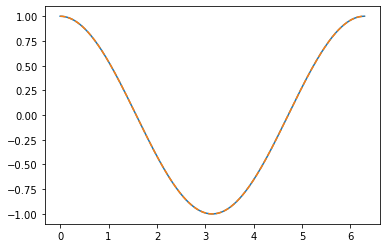

In [21]:
solucion = RK2(osc_armonico , [0,2*pi] , [1,0] )
plot(solucion[0],solucion[1][0])
plot(solucion[0],cos(solucion[0]),'--')
show()

In [22]:
def RK4(f , t_intervalo , y0 , delta=0.01):
    t = arange(t_intervalo[0],t_intervalo[1]+delta,delta)
    sol = zeros((len(y0),len(t)))
    sol[:,0] = y0
    for i in range(len(t)-1):
        k1 = f( t[i] , sol[:,i] )
        k2 = f( t[i] + 0.5*delta , sol[:,i] + 0.5*delta*k1 )
        k3 = f( t[i] + 0.5*delta , sol[:,i] + 0.5*delta*k2 )
        k4 = f( t[i] + delta , sol[:,i] + delta*k3 )
        sol[:,i+1] = sol[:,i] + (delta/6)*(k1 + 2*k2 + 2*k3 + k4)
    return (t,sol)

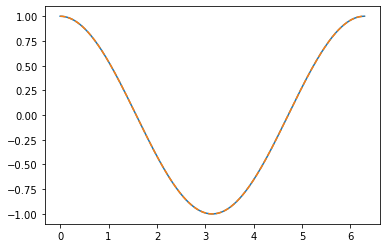

In [23]:
solucion = RK4(osc_armonico , [0,2*pi] , [1,0] )
plot(solucion[0],solucion[1][0])
plot(solucion[0],cos(solucion[0]),'--')
show()

In [33]:
def ode_exp(f , t_intervalo , y0 , jac , delta=0.01):
    t = arange(t_intervalo[0],t_intervalo[1]+delta,delta)
    sol = zeros((len(y0),len(t)))
    sol[:,0] = y0
    for i in range(len(t)-1):
        sol[:,i+1] = sol[:,i] + delta*f(t[i],sol[:,i]) 
        + 0.5*(delta**2)*dot(jac(t[i],sol[:,i]),f(t[i],sol[:,i]))
    return (t,sol)

In [32]:
def jac_osc_armonico(t,x,omega2=1):
    # x == (x,v)
    return array([[0,1.0],[-omega2,0]])

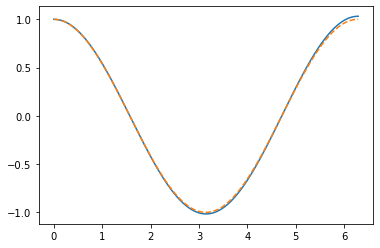

In [34]:
solucion = ode_exp(osc_armonico , [0,2*pi] , [1,0] , jac_osc_armonico)
plot(solucion[0],solucion[1][0])
plot(solucion[0],cos(solucion[0]),'--')
show()

In [35]:
from scipy.integrate import *

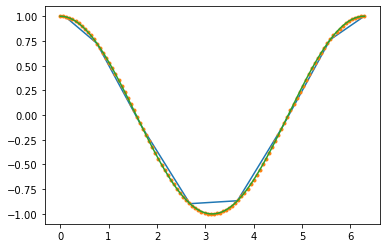

In [57]:
solucion = solve_ivp(osc_armonico,(0,2*pi) , [1,0], dense_output=True)
t = linspace(0,2*pi,100)
plot(solucion.t,solucion.y[0])
plot(t,solucion.sol(t)[0],'.')

solucion = RK4(osc_armonico , [0,2*pi] , [1,0] )
plot(solucion[0],solucion[1][0])

show()